# Download the dataset from kaggle

In [1]:
import os

# Install kaggle package
!pip install kaggle

In [2]:
# Dataset 1 - Flickr Image Dataset
# https://www.kaggle.com/hsankesara/flickr-image-dataset

# Download dataset
dataset_dir = './data/Flickr30k_dataset'
!kaggle datasets download -d hsankesara/flickr-image-dataset -p $dataset_dir

# Unzip dataset
if not os.path.exists(dataset_dir + '/flickr30k_images'):
    !(cd $dataset_dir; unzip -q flickr-image-dataset.zip)
    print('Unzip dataset completed')
else:
    print('Dataset already exists')

flickr-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset already exists


# Clean-up the dataset

In [3]:
# The original dataset has duplicate image directory and results.csv

dup_results_csv = dataset_dir + '/flickr30k_images/flickr30k_images/results.csv'
dup_images_dir  = dataset_dir + '/flickr30k_images/flickr30k_images/flickr30k_images'

if os.path.exists(dup_results_csv):
    !rm -f $dup_results_csv
if os.path.exists(dup_images_dir):
    !rm -rf $dup_images_dir

In [4]:
# The results.csv file has a mal-formed line. One of the delimiters is missing.
# Wrong:   "2199200615.jpg| 4   A dog runs across the grass ."
# Correct: "2199200615.jpg| 4|  A dog runs across the grass ."

import pandas as pd

results_csv = dataset_dir + '/flickr30k_images/results.csv'
image_dir = dataset_dir + '/flickr30k_images/flickr30k_images'

results_fixed_csv = dataset_dir + '/flickr30k_images/results_fixed.csv'
if not os.path.exists(results_fixed_csv):
    !sed 's/2199200615.jpg| 4   A dog runs across the grass ./2199200615.jpg| 4| A dog runs across the grass ./g' $results_csv > $results_fixed_csv

In [5]:
# Remove leading and trailing spaces
captions = pd.read_csv(results_fixed_csv, delimiter='|')
captions.columns = captions.columns.str.strip()
captions['image_name'] = captions['image_name'].str.strip()
captions['comment'] = captions['comment'].str.strip()

# Explore the dataset

In [6]:
captions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158915 entries, 0 to 158914
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   image_name      158915 non-null  object
 1   comment_number  158915 non-null  int64 
 2   comment         158915 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


In [7]:
captions.describe(include='all')

,image_name,comment_number,comment
count,158915,158915.000000,158915
unique,31783,NaN,158439
top,1000092795.jpg,NaN,Two dogs playing in the snow .
freq,5,NaN,7
mean,NaN,2.000000,NaN
std,NaN,1.414218,NaN
min,NaN,0.000000,NaN
25%,NaN,1.000000,NaN
50%,NaN,2.000000,NaN
75%,NaN,3.000000,NaN


In [8]:
# How doest the caption data look like?
captions.head(10)

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their ...
1,1000092795.jpg,1,"Two young , White males are outside near many ..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a giant...
6,10002456.jpg,1,Workers look down from up above on a piece of ...
7,10002456.jpg,2,Two men working on a machine wearing hard hats .
8,10002456.jpg,3,Four men on top of a tall structure .
9,10002456.jpg,4,Three men on a large rig .


In [9]:
captions.tail(10)

,image_name,comment_number,comment
158905,99804383.jpg,0,An older busker in glasses plays an Eastern st...
158906,99804383.jpg,1,This is a man in front of a store performing w...
158907,99804383.jpg,2,A older Asian man is playing an instrument in ...
158908,99804383.jpg,3,An elderly man sits outside a storefront accom...
158909,99804383.jpg,4,An elderly gentleman playing a musical instrum...
158910,998845445.jpg,0,A man in shorts and a Hawaiian shirt leans ove...
158911,998845445.jpg,1,"A young man hanging over the side of a boat , ..."
158912,998845445.jpg,2,A man is leaning off of the side of a blue and...
158913,998845445.jpg,3,"A man riding a small boat in a harbor , with f..."
158914,998845445.jpg,4,A man on a moored blue and white boat with hil...


In [10]:
# There are 31783 unique images and each of the images has 5 comments.
captions['image_name'].unique().shape, captions.shape

((31783,), (158915, 3))

In [11]:
# There's no NA data
captions.isna().sum()

image_name        0
comment_number    0
comment           0
dtype: int64

In [12]:
# There's no zero-length string in the comment column
(captions.comment.str.len() == 0).sum()

0

Max: 82, Min: 2


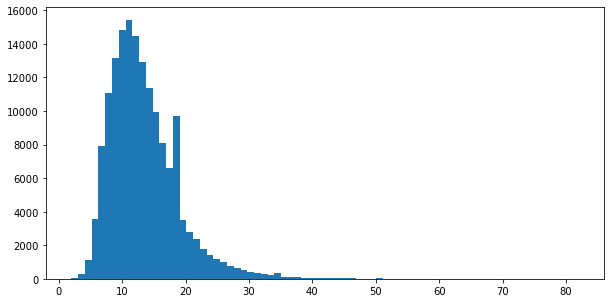

In [13]:
# Caption word length distribution

import matplotlib.pyplot as plt

lengths=[len(t.split()) for t in captions.comment]
print('Max: {}, Min: {}'.format(max(lengths), min(lengths)))

plt.figure(figsize=(10,5))
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their ...
1,1000092795.jpg,1,"Two young , White males are outside near many ..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


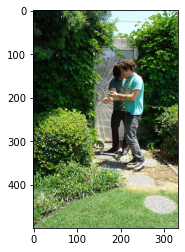

In [14]:
# Show a sample image and captions

from PIL import Image
import numpy as np

sample_image = captions.image_name[0]
image = Image.open(image_dir + '/' + sample_image)
plt.imshow(np.asarray(image))
captions[captions['image_name'] == sample_image]

In [15]:
# For every image_name, the corresponding image file should exist.

image_info = pd.DataFrame(captions['image_name'].unique(), columns=['image_name'])
image_info['file_path'] = image_dir + '/' + image_info['image_name']
assert(image_info['file_path'].map(os.path.isfile).sum() == len(image_info))

Text(0, 0.5, 'Height')

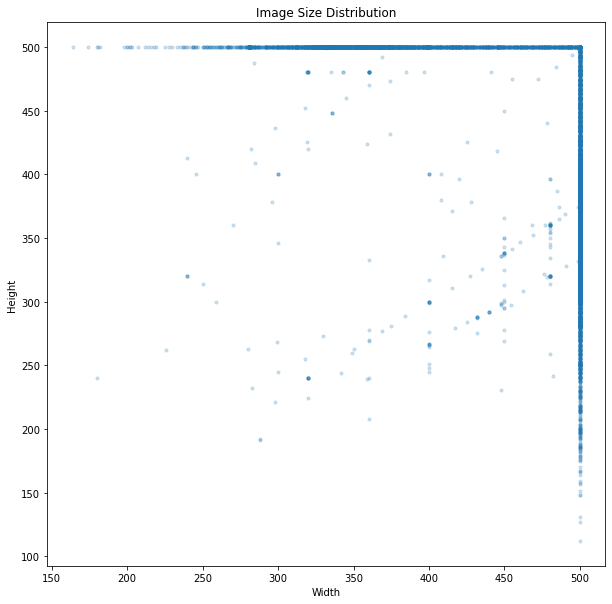

In [16]:
# Image size distribution

image_size = image_info['file_path'].apply(lambda file_path: Image.open(file_path).size)
image_info[['width', 'height']] = list(image_size)

plt.figure(figsize=(10, 10))
plt.scatter(image_info.width, image_info.height, s=10, alpha=0.2)
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')